In [111]:
import pandas as pd
def get_df():
    df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
    df = df.drop(df.index[:13])
    df = df.drop(df.index[-1:])
    df['datetime'] = pd.date_range(start='2016-03-01', periods=85, freq='MS')
    return df

date time

Koeficienty korelace

In [36]:
df = get_df()
#>> normalni dataset koeficienty
parametry = ["aktivni-1", "nove-1","zbytek-1"]
for parametr in parametry:
    corr_coef = df['aktivni'].corr(df[parametr])
    print(f"korelační koeficient aktivni a {parametr}: {corr_coef}")

#>> detrendovany dataset koeficienty
print("\ndetrendovaná data")
for parametr in parametry:
    corr_coef = df_detrend['aktivni'].corr(df_detrend[parametr])
    print(f"korelační koeficient aktivni a {parametr} : {corr_coef}")

korelační koeficient aktivni a aktivni-1: 0.8973287055875158
korelační koeficient aktivni a nove-1: 0.5140165029844599
korelační koeficient aktivni a zbytek-1: 0.8140995921691819

detrendovaná data
korelační koeficient aktivni a aktivni-1 : 0.7913193280400831
korelační koeficient aktivni a nove-1 : 0.33813350167069156
korelační koeficient aktivni a zbytek-1 : 0.7267415094505184


Grafy, detrendování pandas

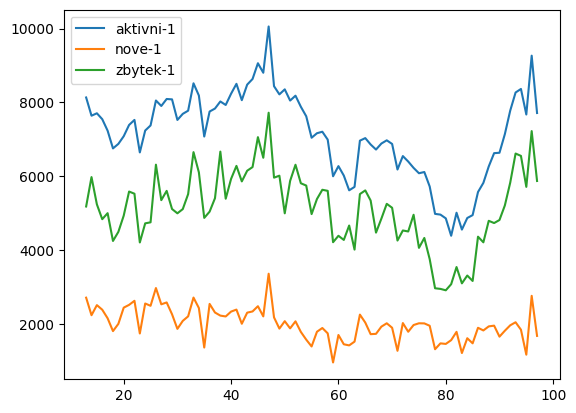

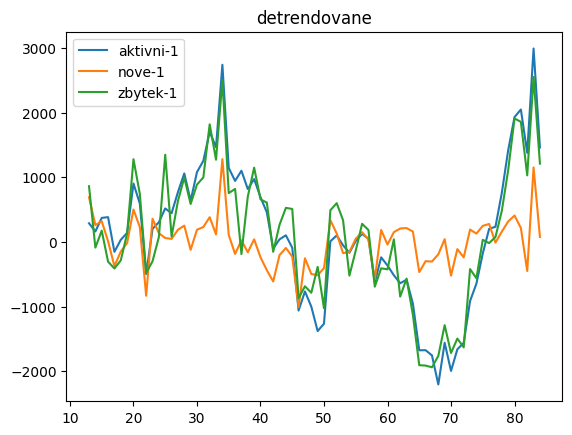

In [33]:
from matplotlib import pyplot as plt
import scipy
df = get_df()
#>> normalni data
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()
#>> detrendovane data
df_detrend = df
df_detrend["aktivni-1"] = pd.Series(scipy.signal.detrend(df['aktivni-1']))
df_detrend["nove-1"] = pd.Series(scipy.signal.detrend(df['nove-1']))
df_detrend["zbytek-1"] = pd.Series(scipy.signal.detrend(df['zbytek-1']))
plt.title('detrendovane')
plt.plot(df.index, df_detrend['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()


Detrendování pandas

In [117]:
import pandas as pd
df = get_df()
parametry = ['aktivni-1', 'nove-1', ]
for parametr in parametry:
    df_detrend[parametr] = pd.Series((df[parametr]))

desesonializovani dat

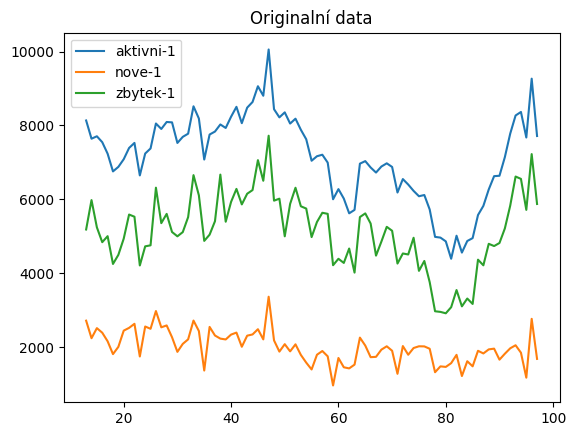

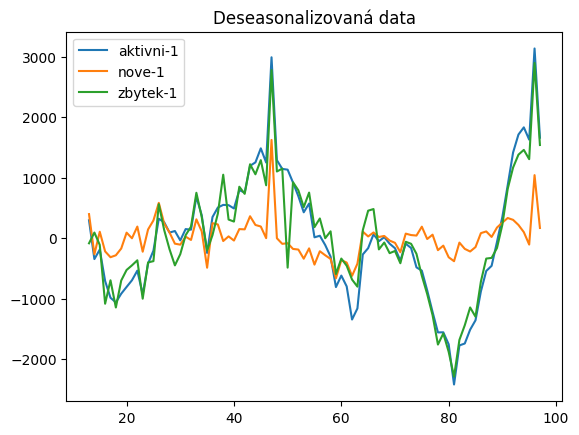

In [123]:
from matplotlib import pyplot as plt
import scipy
import statsmodels.api as sm

df = get_df()
# Plot the original data
plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Originalní data')
plt.show()


#@ parametry
parametry = ['aktivni', 'aktivni-1', 'nove-1', 'zbytek-1']
# Detrend the data
df_detrend = df.copy()
df_detrend["aktivni-1"] = scipy.signal.detrend(df['aktivni-1'])
df_detrend["nove-1"] = scipy.signal.detrend(df['nove-1'])
df_detrend["zbytek-1"] = scipy.signal.detrend(df['zbytek-1'])

datetime_index = pd.DatetimeIndex(df_detrend['datetime'])
df_detrend['datetime'] = datetime_index

# deseasonalize the data
df_deseasoned = df_detrend

for parametr in parametry:
    decomp = sm.tsa.seasonal_decompose(df_detrend[parametr], period=12, model='additive')
    df_deseasoned[parametr] = df_detrend[parametr] - decomp.seasonal.values


# Plot the deseasonalized data
plt.plot(df.index, df_deseasoned['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_deseasoned['nove-1'], label='nove-1')
plt.plot(df.index, df_deseasoned['zbytek-1'], label='zbytek-1')
plt.legend()
plt.title('Deseasonalizovaná data')
plt.show()


detrendování polinominální regresí 

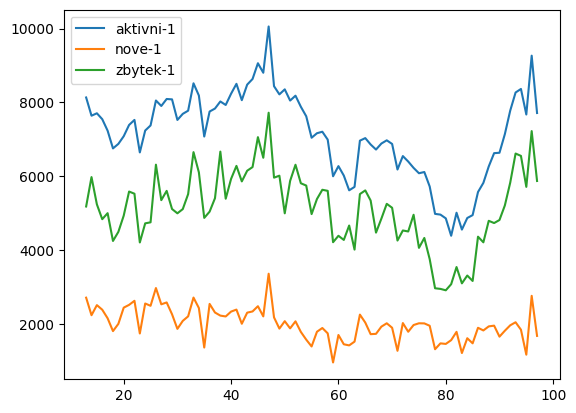

KeyError: 'aktivni-1'

In [16]:
# Import libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
df = get_df()
# Define X and y
X = df[["aktivni-1", "nove-1","zbytek-1"]]
y = df[['aktivni']]
# Define the degree of the polynomial
degree = 3
# Fit a polynomial regression to the data
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
# Predict the trend line
trend = model.predict(X_poly)
# Subtract the trend from the original data
df_detrend_polyregression = y - trend

plt.plot(df.index, df['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df['nove-1'], label='nove-1')
plt.plot(df.index, df['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()

plt.plot(df.index, df_detrend_polyregression['aktivni-1'], label='aktivni-1')
plt.plot(df.index, df_detrend_polyregression['nove-1'], label='nove-1')
plt.plot(df.index, df_detrend_polyregression['zbytek-1'], label='zbytek-1')
plt.legend()
plt.show()